<a href="https://colab.research.google.com/github/LeonardoRiVi/Carrera-de-caballos/blob/main/Copia_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# create class for graph visualization
class GraphVisualization:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())

  # method for add edges
  def addEdge(self, a, b, dif):
    self.G.add_edge(a, b, dif=dif)
  
  # method for visualize a graph
  def visualize(self):
    pos = nx.spring_layout(self.G)
    diff = nx.get_edge_attributes(self.G, "dif")

    self.G.add_nodes_from(self.nodes)
    plt.figure()
    nx.draw(
      self.G, pos, edge_color='black', width=1, linewidths=1,
      node_size=500, node_color='pink', alpha=0.9,
      labels={node: node for node in self.G.nodes()}
    )
    nx.draw_networkx_edge_labels(self.G, pos, edge_labels=diff)
    plt.axis('off')
    plt.show()

  # visualize a graph
  def graph_visualize(self):
    for i in self.graph:
      for j in self.graph[i]:
        self.addEdge(i, j['v'], j['w'])

    self.visualize()

In [ ]:
# Created graph
graph = {
    'A': [{'v': 'B','w': 4}, {'v': 'C','w': 2}],
    'B': [{'v': 'A','w': 4}, {'v': 'C','w': 6}, {'v': 'D','w': 5},{'v': 'E','w': 2}],
    'C': [{'v': 'A','w': 2}, {'v': 'B','w': 1}, {'v': 'D','w': 8}, {'v': 'E','w': 10}],
    'D': [{'v': 'B','w': 5}, {'v': 'C','w': 8}, {'v': 'E','w': 2}, {'v': 'Z','w': 1}],
    'E': [{'v': 'C','w': 10}, {'v': 'D','w': 2}, {'v': 'Z','w': 3}],
    'Z': [{'v': 'D','w': 1}, {'v': 'E','w': 3}]
}

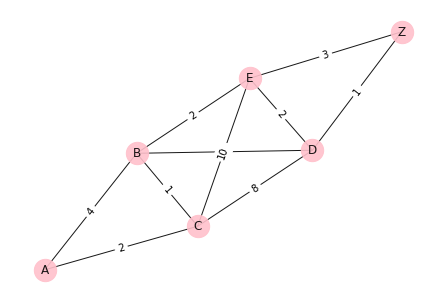

In [ ]:
# visualize graph
G = GraphVisualization(graph=graph)
G.graph_visualize()

In [ ]:
# function for get path weight
def get_path_dif(path):
  path_dif = 0

  for index, value in enumerate(path):
    try:
      for j in graph[value]:
        if j['v'] == path[index + 1]:
            path_dif += j['w']
    except:
      break

  return path_dif

In [ ]:
# function to find the shortest path (dijkstra algorithm)
def find_shortest_path(graph, start, end, path =[]):
  path = path + [start]
  shortest = None
  diff = None

  if start == end: return path

  for node in graph[start]:
      if node['v'] not in path:
          newpath = find_shortest_path(graph, node['v'], end, path)
          if newpath:
            new_difc = get_path_dif(newpath)
            if not diff or new_difc < diff:
              shortest = newpath
              diff = new_difc

  return shortest

In [ ]:
shortest_path = find_shortest_path(graph, 'A', 'Z')
dif_shortest_path = get_path_dif(shortest_path)

print('Shortest Path :', shortest_path)
print('Dif :', dif_shortest_path)

Shortest Path : ['A', 'C', 'B', 'E', 'D', 'Z']
Dif : 8


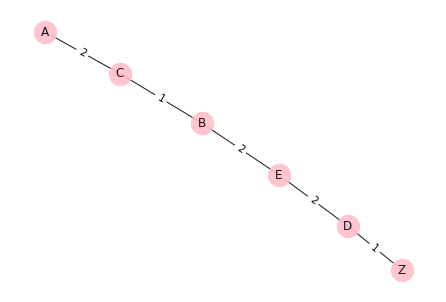

In [ ]:
shortest_graph = {}

# generate shortest_graph
for index, value in enumerate(shortest_path):
  try:
    for j in graph[value]:
      if j['v'] == shortest_path[index + 1]:
        shortest_graph.update({value: [j]})
  except:
    break

# Visualize shortest path
S = GraphVisualization(shortest_graph)

for i in shortest_graph:
  for j in shortest_graph[i]:
        S.addEdge(i, j['v'], j['w'])

S.visualize()